In [2]:
import pandas as pd
import numpy as np
from os import path
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('steam_games_all_fields.csv', sep="\t", index_col=0)
df = df.dropna()
df.dtypes

game_title          object
steam_url           object
tags                object
image               object
description         object
number_of_review    object
score               object
release_date        object
dtype: object

In [4]:
#steam_games_id[~steam_games_id.app.str.contains('digitalgiftcards')]

df = df[~df.description.str.contains('no description')]
df.count()

game_title          29271
steam_url           29271
tags                29271
image               29271
description         29271
number_of_review    29271
score               29271
release_date        29271
dtype: int64

In [5]:
df[['game_title', 'description', 'number_of_review']].head()

,game_title,description,number_of_review
0,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,2915091
1,MONSTER HUNTER: WORLD,Welcome to a new world! In Monster Hunter: Wor...,55314
2,Path of Exile,"You are an Exile, struggling to survive on the...",74977
3,Insurgency: Sandstorm,"Insurgency: Sandstorm is a team-based, tactica...",9019
4,Warframe,Warframe is a cooperative free-to-play third p...,236593


In [33]:
?WordCloud

In [6]:
text = df.description[0]

In [7]:
df.description

0        Counter-Strike: Global Offensive (CS: GO) expa...
1        Welcome to a new world! In Monster Hunter: Wor...
2        You are an Exile, struggling to survive on the...
3        Insurgency: Sandstorm is a team-based, tactica...
4        Warframe is a cooperative free-to-play third p...
5        The eagerly anticipated sequel to the award-wi...
6        Choose your fate in Assassin's Creed® Odyssey....
7        Soccer meets driving once again in the long-aw...
8        Tom Clancy's Rainbow Six Siege is the latest i...
9        Los Santos is a city of bright lights, long ni...
10       Nine distinct classes provide a broad range of...
11       PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...
12       The only aim in Rust is to survive. To do this...
13       You've inherited your grandfather's old farm p...
14       The sequel to the critically acclaimed Vermint...
15       War Thunder is the most comprehensive free-to-...
16       Strategy gaming perfected. A breath-taking cam.

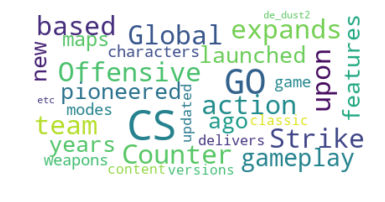

In [8]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
text = " ".join(desc for desc in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 5980934 words in the combination of all review.


In [9]:
stopwords = set(STOPWORDS)

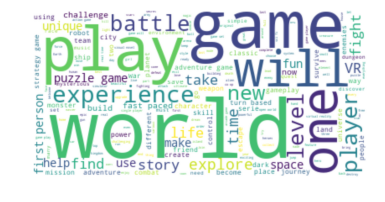

In [10]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='gaussian')
plt.axis('off')
plt.show()

In [11]:
text = " ".join(desc for desc in df.tags)

In [4]:
counter = Counter(tags['steam_tags'])

In [11]:
steamtags = tags['steam_tags']

'FPS, Multiplayer, Shooter, Action, Team-Based, Competitive, Tactical, First-Person, e-sports, PvP, Online Co-Op, Military, Co-op, Strategy, War, Trading, Difficult, Realistic, Fast-Paced, Moddable Action, Hunting, Co-op, Multiplayer, Open World, Third Person, RPG, Adventure, Fantasy, Singleplayer, Action RPG, Character Customization, Difficult, Great Soundtrack, Exploration, Atmospheric, JRPG, Replay Value, Hack and Slash, Souls-like Free to Play, Action RPG, RPG, Hack and Slash, Multiplayer, Massively Multiplayer, Action, Loot, Fantasy, Adventure, MMORPG, Indie, Dungeon Crawler, Online Co-Op, Co-op, Character Customization, PvE, Dark Fantasy, Inventory Management, Fishing FPS, Realistic, Action, Shooter, Multiplayer, Military, Tactical, First-Person, Singleplayer, War, Atmospheric, Online Co-Op, Violent, Co-op, Difficult, Gore, Open World, Massively Multiplayer, Choices Matter, Indie Free to Play, Action, Co-op, Multiplayer, Third-Person Shooter, Sci-fi, Ninja, Shooter, Parkour, Spac

In [12]:
textlist = text.split(", ")

wordfreq = [textlist.count(w) for w in textlist]
    
#print("List\n" + str(textlist) + "\n")
#print("Frequencies\n" + str(wordfreq) + "\n")
#print("Pairs\n" + str(zip(textlist, wordfreq)))
pairs = Counter(text.split(", ")).most_common(25)
#sorted(pairs, key=lambda tup: tup[1])
pairs

[('Indie', 14753),
 ('Adventure', 7993),
 ('Action', 7766),
 ('Casual', 7410),
 ('Singleplayer', 5808),
 ('Simulation', 4138),
 ('Strategy', 3699),
 ('RPG', 3629),
 ('Early Access', 3219),
 ('2D', 2767),
 ('Great Soundtrack', 2704),
 ('Multiplayer', 2640),
 ('Atmospheric', 2557),
 ('Puzzle', 2401),
 ('Story Rich', 1850),
 ('Difficult', 1630),
 ('Platformer', 1623),
 ('Violent', 1621),
 ('Sci-fi', 1581),
 ('Shooter', 1553),
 ('Gore', 1506),
 ('Pixel Graphics', 1496),
 ('Funny', 1482),
 ('Horror', 1434),
 ('Female Protagonist', 1426)]

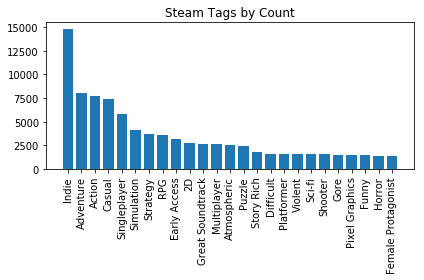

In [13]:
word = []
frequency = []

for i in range(len(pairs)):
    word.append(pairs[i][0])
    frequency.append(pairs[i][1])

indices = np.arange(len(pairs))
plt.bar(indices, frequency)
plt.title('Steam Tags by Count')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.show()

In [49]:
Counter(text.split()).most_common(10)

[('Indie,', 20065),
 ('Action,', 13349),
 ('Adventure,', 11606),
 ('Casual,', 9843),
 ('Early', 7275),
 ('Access,', 6540),
 ('Strategy,', 6301),
 ('Singleplayer,', 5795),
 ('RPG,', 5379),
 ('Simulation,', 5164)]

In [50]:
counter = Counter(text.split()).most_common(3)
tag_names = counter.keys()
tag_counts = counter.values()

indexes = np.arange(len(tag_names))
width = 0.7
plt.bar(indexes, tag_counts, width)
plt.xticks(indexes + width * 0.5, tag_names)
plt.show()

AttributeError: 'list' object has no attribute 'keys'

In [48]:
tag_names

dict_keys(['FPS,', 'Multiplayer,', 'Shooter,', 'Action,', 'Team-Based,', 'Competitive,', 'Tactical,', 'First-Person,', 'e-sports,', 'PvP,', 'Online', 'Co-Op,', 'Military,', 'Co-op,', 'Strategy,', 'War,', 'Trading,', 'Difficult,', 'Realistic,', 'Fast-Paced,', 'Moddable', 'Hunting,', 'Open', 'World,', 'Third', 'Person,', 'RPG,', 'Adventure,', 'Fantasy,', 'Singleplayer,', 'Action', 'Character', 'Customization,', 'Great', 'Soundtrack,', 'Exploration,', 'Atmospheric,', 'JRPG,', 'Replay', 'Value,', 'Hack', 'and', 'Slash,', 'Souls-like', 'Free', 'to', 'Play,', 'Massively', 'Loot,', 'MMORPG,', 'Indie,', 'Dungeon', 'Crawler,', 'PvE,', 'Dark', 'Inventory', 'Management,', 'Fishing', 'Violent,', 'Gore,', 'Choices', 'Matter,', 'Indie', 'Third-Person', 'Sci-fi,', 'Ninja,', 'Parkour,', 'Space,', 'Futuristic,', 'Cyberpunk', 'Turn-Based,', 'Story', 'Rich,', 'Turn-Based', 'Combat,', 'CRPG,', 'Tactics,', 'Isometric,', 'Party-Based', 'Female', 'Protagonist', 'Assassin,', 'Historical,', 'Stealth,', 'Protag